In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

In [2]:
df = pd.read_csv("train_cirrhosis.csv")
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [9]:
# check null values
df.isna().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [10]:
# y is multi-class, so label encoding it

le = LabelEncoder()

y = df["Status"]
y = le.fit_transform(df["Status"])

le.classes_

array(['C', 'CL', 'D'], dtype=object)

In [11]:
# create dummy for x (hot encoding)

X = df.drop(["Status", "id"], axis = 1)
dum_X = pd.get_dummies(X, drop_first =  True)
dum_X.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,False,True,False,False,False,False,False
1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,True,False,False,False,False,False,False
2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,True,False,False,True,True,False,True
3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,True,False,False,False,False,False,False
4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,True,False,False,True,False,False,False


In [12]:
# create class for decisiontreeclassifier

dtc = DecisionTreeClassifier()
dtc.fit(dum_X,y)



DecisionTreeClassifier()

[Text(0.5578790019178853, 0.9833333333333333, 'Bilirubin <= 1.95\ngini = 0.491\nsamples = 7905\nvalue = [4965, 275, 2665]\nclass = C'),
 Text(0.3458416284041063, 0.95, 'Stage <= 3.5\ngini = 0.311\nsamples = 5272\nvalue = [4285, 101, 886]\nclass = C'),
 Text(0.25050913009815823, 0.9166666666666666, 'Prothrombin <= 10.95\ngini = 0.217\nsamples = 3972\nvalue = [3490, 73, 409]\nclass = C'),
 Text(0.17731325289122943, 0.8833333333333333, 'Hepatomegaly_Y <= 0.5\ngini = 0.178\nsamples = 3407\nvalue = [3077, 62, 268]\nclass = C'),
 Text(0.1092121081200867, 0.85, 'SGOT <= 128.325\ngini = 0.133\nsamples = 2652\nvalue = [2465, 38, 149]\nclass = C'),
 Text(0.06643108966293872, 0.8166666666666667, 'N_Days <= 902.5\ngini = 0.096\nsamples = 2074\nvalue = [1970, 23, 81]\nclass = C'),
 Text(0.03285527730276265, 0.7833333333333333, 'Alk_Phos <= 2090.0\ngini = 0.339\nsamples = 40\nvalue = [32, 3, 5]\nclass = C'),
 Text(0.0320052308158454, 0.75, 'Alk_Phos <= 680.5\ngini = 0.273\nsamples = 38\nvalue = [32,

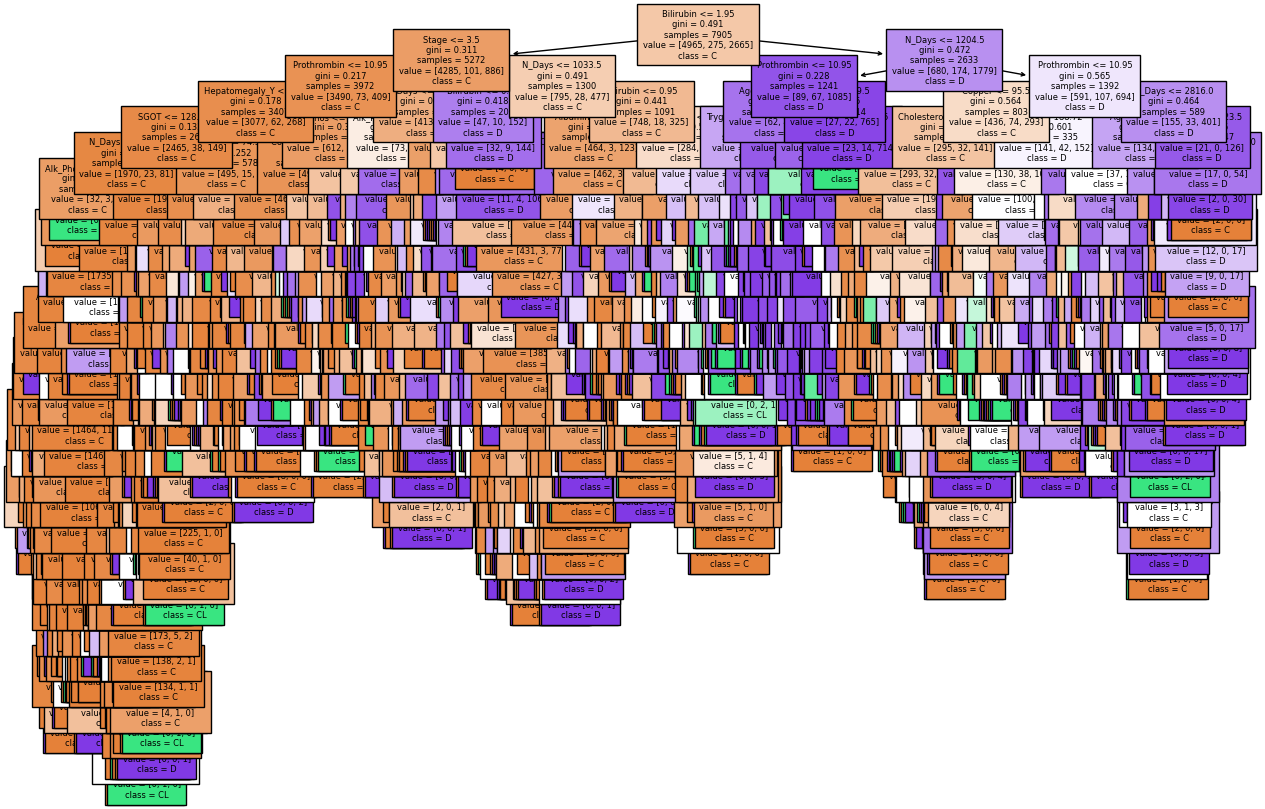

In [14]:
# plot the tree

plt.figure(figsize = (15,10))
plot_tree(dtc, feature_names = list(dum_X.columns),
                             class_names = ["C", "CL","D"],
                             filled = True, fontsize = 6)

In [19]:
#gridsearch to find best max_depth, min_samples_leaf, min_samples_split

kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 24)


params = {"min_samples_split": np.arange(2,35,5),
        "min_samples_leaf": np.arange(1,35,5),
        "max_depth": [None, 4,3,2,6,8,10]}

gcv = GridSearchCV(dtc,param_grid =params, cv = kfold, scoring = "neg_log_loss")
gcv.fit(dum_X,y)
print(gcv.best_score_)
print(gcv.best_params_)

-0.5332237830893267
{'max_depth': 4, 'min_samples_leaf': 31, 'min_samples_split': 2}


[Text(0.5, 0.9, 'Bilirubin <= 1.95\ngini = 0.491\nsamples = 7905\nvalue = [4965, 275, 2665]\nclass = C'),
 Text(0.25, 0.7, 'Stage <= 3.5\ngini = 0.311\nsamples = 5272\nvalue = [4285, 101, 886]\nclass = C'),
 Text(0.125, 0.5, 'Prothrombin <= 10.95\ngini = 0.217\nsamples = 3972\nvalue = [3490, 73, 409]\nclass = C'),
 Text(0.0625, 0.3, 'Hepatomegaly_Y <= 0.5\ngini = 0.178\nsamples = 3407\nvalue = [3077, 62, 268]\nclass = C'),
 Text(0.03125, 0.1, 'gini = 0.133\nsamples = 2652\nvalue = [2465, 38, 149]\nclass = C'),
 Text(0.09375, 0.1, 'gini = 0.317\nsamples = 755\nvalue = [612, 24, 119]\nclass = C'),
 Text(0.1875, 0.3, 'N_Days <= 1552.5\ngini = 0.403\nsamples = 565\nvalue = [413, 11, 141]\nclass = C'),
 Text(0.15625, 0.1, 'gini = 0.537\nsamples = 141\nvalue = [73, 6, 62]\nclass = C'),
 Text(0.21875, 0.1, 'gini = 0.322\nsamples = 424\nvalue = [340, 5, 79]\nclass = C'),
 Text(0.375, 0.5, 'N_Days <= 1033.5\ngini = 0.491\nsamples = 1300\nvalue = [795, 28, 477]\nclass = C'),
 Text(0.3125, 0.3, '

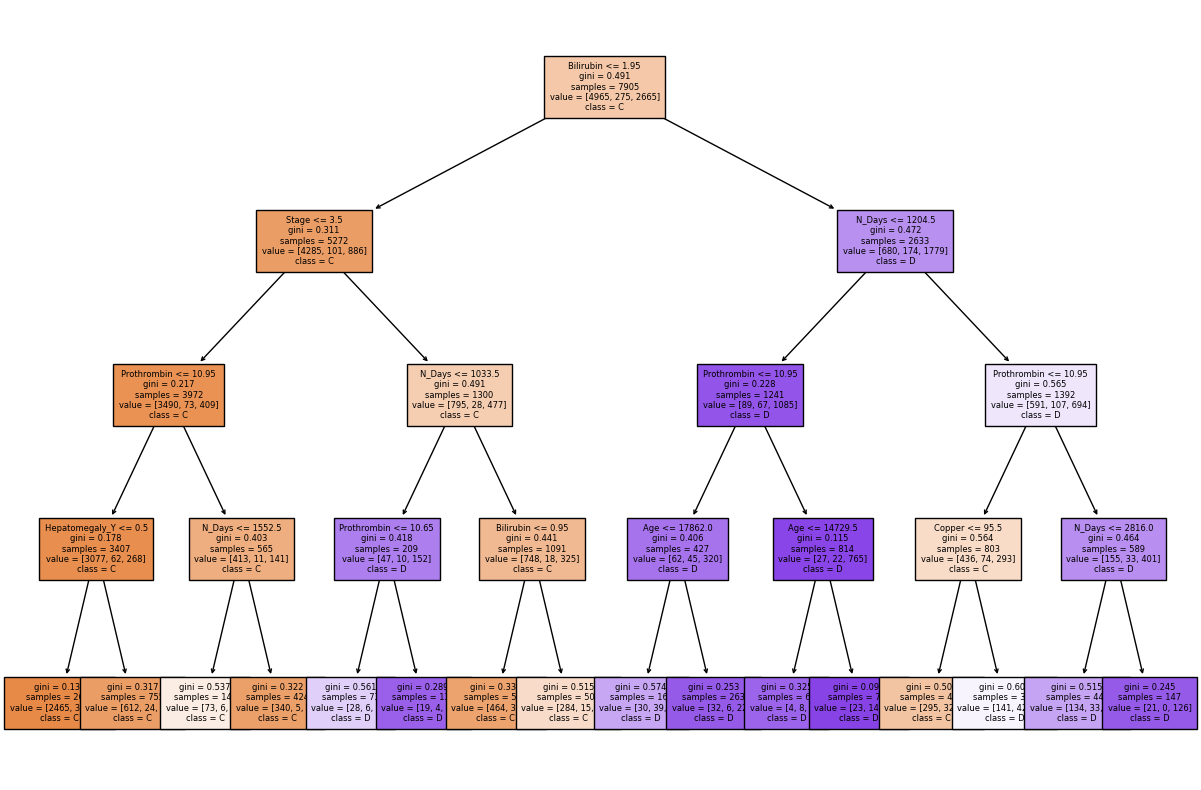

In [24]:
# plot best tree

best_tree = gcv.best_estimator_
plt.figure(figsize=(15,10))
plot_tree(best_tree, feature_names = list(dum_X.columns),
          class_names = ["C", "CL","D"],
          filled = True, fontsize = 6)

[0.17025072 0.00926567 0.64452582 0.         0.         0.00868199
 0.         0.         0.         0.         0.07078901 0.08730178
 0.         0.         0.         0.009185   0.         0.
 0.        ]


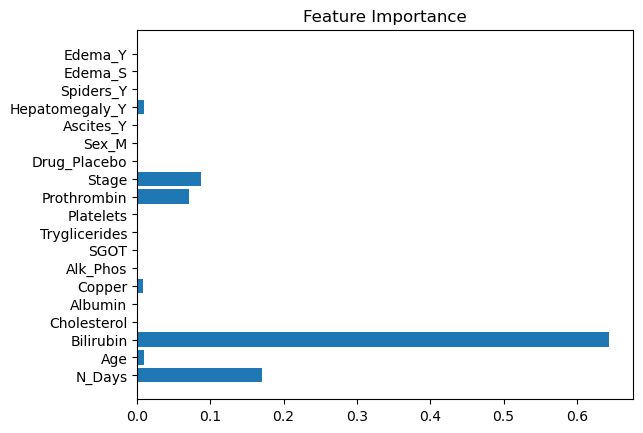

In [30]:
# feature importance

print(best_tree.feature_importances_)

df_imp = pd.DataFrame({'Feature':list(dum_X.columns), 'Importance':best_tree.feature_importances_})

#plotting feature importance
plt.barh(df_imp['Feature'],
       df_imp['Importance'])
plt.title("Feature Importance")

plt.show()